## PROJECT OBJECTIVE AND ANALYSIS ROADMAP

The objective of this project is to analyze which factors have the most influence on the success of a game. We will look at price strategies, genres, publishers and developers to find out what factors lead to a game having better engagement(total downloads), quality(rating) & player retention(average playtime). The big question we will try to answer after the analysis is: What makes a game successful? To reach this answer we will follow this roadmap:

First, we will have a general overview of the dataset. We will look at the evolution of the industry in total games released, downloads per year, and average rating per year among others. Once we have a general sense of the data, we will move to analyze 3 big groups:
- Price Groups: We have a column that classifies the game based on its price (free, cheap, moderate and expensive). We will analyze if the type of price has an impact on downloads, ratings, playtime and the distribution of the top 100.
- Genres: We will study the impact of genre on the variables that we are analyzing. What are the most popular genres? Which has better retention? Which games dominate the top 100?
- Publisher and Developers: We will see which publishers and developers dominate the industry. How many games they have developed, how many downloads they have, average rating, and price distribution. In short, what strategy do the industry giants follow?


## ABOUT THE DATASET 

The original data set comes from a Kaggle user who collected the data from the Steam store(link:https://www.kaggle.com/datasets/nikdavis/steam-store-games). The dataset was not very clean and I had to make some changes to the columns, as well as add new ones that we will use in our analysis. The entire cleaning process can be found at : https://github.com/manumg/10-Years-of-Steam/blob/main/STEAM%20CLEANING.ipynb. In this file, I explain the entire cleaning process that I carry out.

The final dataset contains 47567 rows (each row is a different game) and 30 columns. The data set is large enough to drive a data project and draw possible conclusions about games on the Steam store.

One last note about dataset modifications: I decided to focus my analysis from the 2010 to 2021 period(the original dataset has data since the beginning of steam). The gaming industry is constantly evolving. If we carry out our analysis from 2003 (when steam was created) until today, it would be more difficult to draw conclusions about the state of the industry. In the original dataset, 15784 games were released before 2010 while 52439 were released after 2010, so we will still have a look at the vast majority of games released on Steam. I also removed all those games that had 0 downloads and 0 interactions(no Peak CCU, no recommendations, no rating, no positive and negative interactions...). Our focus is finding out what makes a game great. Anyone can upload a game to steam, so we have a lot of games. Many of those games never get a player, we are not interested in these games and skew our data.



In [2]:
#Importing libraries:

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter, FuncFormatter

#Importing dataset:

games = pd.read_csv('steam_cleaned2.csv')

In [3]:
games.head()

,Unnamed: 0,Name,Release date,Peak CCU,Price,Positive,Negative,Average playtime forever,Developers,Publishers,...,Adventure,Casual,Indie,Massively Multiplayer,RPG,Racing,Simulation,Strategy,Sports,Price_type
0,1,Train Bandit,2017-10-12,0,0.99,53,5,0,Rusty Moyher,Wild Rooster,...,0,0,1,0,0,0,0,0,0,Paid
1,3,Henosis™,2020-07-23,0,5.99,3,0,0,Odd Critter Games,Odd Critter Games,...,1,1,1,0,0,0,0,0,0,Paid
2,4,Two Weeks in Painland,2020-02-03,0,0.00,50,8,0,Unusual Games,Unusual Games,...,1,0,1,0,0,0,0,0,0,Free
3,5,Wartune Reborn,2021-02-26,68,0.00,87,49,0,7Road,7Road,...,1,1,0,1,1,0,0,1,0,Free
4,8,MazM: Jekyll and Hyde,2020-04-02,1,14.99,76,6,0,Growing Seeds,"CFK Co., Ltd.",...,1,0,0,0,1,0,1,1,0,Paid


In [4]:
games.shape

(47567, 29)

In [5]:
games.columns

Index(['Unnamed: 0', 'Name', 'Release date', 'Peak CCU', 'Price', 'Positive',
       'Negative', 'Average playtime forever', 'Developers', 'Publishers',
       'Owners', 'Release Year', 'total_reviews', 'rating_ratio', 'Rating',
       'Price Group', 'Multi_player', 'Single_player', 'Action', 'Adventure',
       'Casual', 'Indie', 'Massively Multiplayer', 'RPG', 'Racing',
       'Simulation', 'Strategy', 'Sports', 'Price_type'],
      dtype='object')

## GENERAL OVERVIEW


Let's start by looking at some general visualizations about the evolution of the gaming industry in steam.
The first graph is going to be the most downloaded games. 

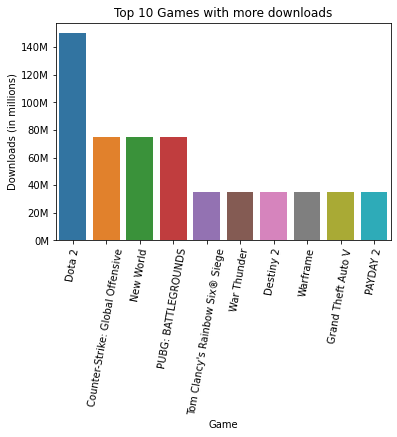

In [64]:
most_downloaded_games = games.groupby("Name").agg({
    "Owners":"sum"
}).reset_index().sort_values("Owners",ascending=False).head(10)

#I am going to define a function to format the y-axis of the plot
def millions_formatter(x,pos):
    return '{:.0f}M'.format(x/1000000)

sns.barplot(x='Name', y='Owners', data = most_downloaded_games)
plt.title("Top 10 Games with more downloads")
plt.xlabel('Game')
plt.ylabel('Downloads (in millions)')
plt.xticks(rotation=80)
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

The Top 10 is composed of games with at least 35M downloads. Dota is the king of steam with 150 million downloads. One step below we have shooters like PUBG and CSGO, as well as Amazon's MMO, New World. All these with 75M downloads.

Let's have a look at how the downloads are distributed. How many games have more than 20k downloads? 100k? 1M? 10M?

In [7]:

print(f'Games with fewer than 20,000 owners: {games[games.Owners < 20000].shape[0]}\n',
      f'Games with more than 20,000 owners: {games[games.Owners >= 20000].shape[0]}')

print(f'Games with fewer than 100,000 owners: {games[games.Owners < 100000].shape[0]}\n',
      f'Games with more than 100,000 owners: {games[games.Owners >= 100000].shape[0]}')

print(f'Games with fewer than 1M owners: {games[games.Owners < 1000000].shape[0]}\n',
      f'Games with more than 1M owners: {games[games.Owners >= 1000000].shape[0]}')

print(f'Games with fewer than 10M owners: {games[games.Owners < 10000000].shape[0]}\n',
      f'Games with more than 10M owners: {games[games.Owners >= 10000000].shape[0]}')


Games with fewer than 20,000 owners: 32538
 Games with more than 20,000 owners: 15029
Games with fewer than 100,000 owners: 42011
 Games with more than 100,000 owners: 5556
Games with fewer than 1M owners: 46728
 Games with more than 1M owners: 839
Games with fewer than 10M owners: 47516
 Games with more than 10M owners: 51


In [8]:
games_sorted = games.sort_values(by='Owners', ascending = False)[['Name', 'Owners', 'Price Group']].head(100)
top_100 = games_sorted.nlargest(100, 'Owners')
game_with_100_more_downloads = top_100.iloc[99]
print(game_with_100_more_downloads['Owners'])

7500000


From this data, we can say that most of the games do not exceed 20k downloads. From the 47567 games of the dataset, 15029 exceed 20K downloads, 5556 have more than 100k downloads, just 839 hit 1M downloads and 51 arrived to 10M users. Getting players to download your game is not an easy task. To be part of the top 100 most downloaded games, your game needs to have at least 750k downloads. 

How have game releases and downloads evolved during the 10 years of our dataset?

<Figure size 720x432 with 0 Axes>

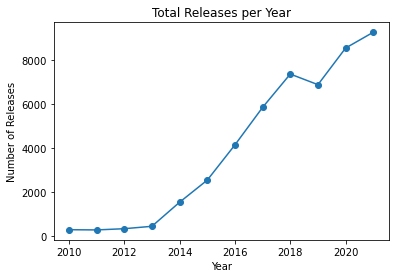

In [9]:
#Number of releases per year 
releases_year = games.groupby("Release Year").agg({
    "Name":"count"}).reset_index()
fig = plt.figure(figsize=(10,6))
ax = releases_year.plot(x='Release Year', y ='Name', kind='line',marker = 'o', legend=None)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Releases')
ax.set_title('Total Releases per Year')
plt.show()


<Figure size 720x432 with 0 Axes>

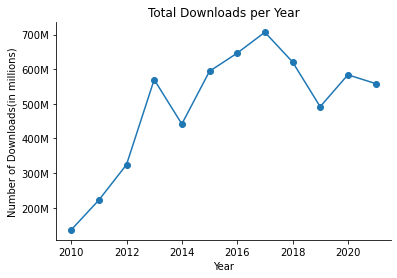

In [10]:
#number of downloads per year
year_down = games.groupby('Release Year').agg({'Owners':'sum'}).reset_index()
total_owners = year_down['Owners']

fig = plt.figure(figsize=(10,6))
ax = year_down.plot(x='Release Year', y ='Owners', kind='line', marker = 'o', legend=None)
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Downloads(in millions)')
ax.set_title('Total Downloads per Year')
sns.despine()
plt.show()

We have different tendencies for releases and downloads. More games have been released year by year on steam(with a small stagnation in 2019). While there is no clear tendency in downloads. From 2010 to 2013 we have an exponential increase. Then, it looks like the platform found its peak in 2017 with 700M downloads and suffered a decrease in downloads in the following years. With the arrival of COVID, downloads increased. It will be interesting to keep an eye on the following years to see if the platform can break the previous peak of 2017.

Let's end up by looking at the average rating of games per year and average playtime


<Figure size 720x432 with 0 Axes>

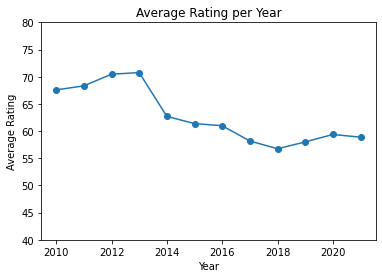

In [65]:
#Mean rating per year
#Rating was calculated based on the steam rating algoritm(in the cleaning project all the process is explained). Rating goes from 0-100
#and is based on positive and negative reviews.
rating_year = games.groupby("Release Year").agg({
    "Rating":"mean"}).reset_index()
fig = plt.figure(figsize=(10,6))
ax = rating_year.plot(x='Release Year', y ='Rating', kind='line',marker = 'o',legend=None)
ax.set_xlabel('Year')
ax.set_ylabel('Average Rating')
ax.set_title('Average Rating per Year')
plt.ylim(40,80)
plt.show()


So we can say that the average rating has been decreasing over time, but can the increasing number of releases impact negatively ratings? We could start by looking at the correlation between these variables, using the Pearson correlation coefficient,  which measures the strength and direction of a linear relationship:

In [12]:
total_releases = games.groupby('Release Year').agg({
    "Name":"count"}).reset_index()
average_rating = games.groupby('Release Year').agg({
    "Rating":"mean"}).reset_index()


In [13]:
import scipy.stats as stats
r, p_value = stats.pearsonr(total_releases['Name'], average_rating['Rating'])
print(f'Correlation coefficient (r): {r}\np-value: {p_value}')

Correlation coefficient (r): -0.8743870488393959
p-value: 0.0001987302169316128


We have a strong negative correlation between the total number of releases per year and the average rating per year. This means that the increase in the number of releases has a strong negative effect on the quality of games. 

<Figure size 720x432 with 0 Axes>

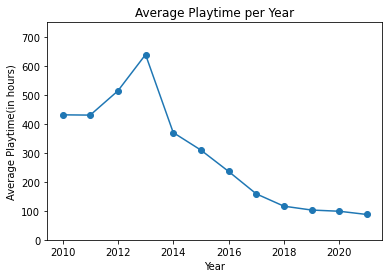

In [66]:
#Average playtime:
average_playtime = games.groupby(['Release Year']).agg({'Average playtime forever':'mean'}).reset_index()
fig = plt.figure(figsize=(10,6))
ax = average_playtime.plot(x='Release Year', y ='Average playtime forever', kind='line',marker = 'o',legend=None)
plt.ylim(0,750)
ax.set_xlabel('Year')
ax.set_ylabel('Average Playtime(in hours)')
ax.set_title('Average Playtime per Year')
plt.show()




After an increase in average playtime at the beginning of the decade, we see a huge drop in engagement. As with the average rating, this drop may also be related to the increase in the number of releases. Let's look at the correlation between the two variables.

In [15]:
r, p_value = stats.pearsonr(total_releases['Name'], average_playtime['Average playtime forever'])
print(f'Correlation coefficient (r): {r}\np-value: {p_value}')

Correlation coefficient (r): -0.9317834513818742
p-value: 1.0367430592649194e-05


The huge increase in the number of releases has a huge impact on the quality(rating) of the games and engagement(average hours played).

Main findings of the general overview:

- Most of the games don't get to 20k downloads. A few giants surpass de 10M players.
    
- The huge increase in game releases had a negative impact on quality(Rating) and engagement(average playtime)
    
- Total downloads seem to have stagnated. 
  

## PRICING


Prices types are assigned in the following way:
   - Free-to-Play -> Price = 0
   - Cheap -> Price between 0 and 10
   - Moderate -> Price between 10 and 40
   - Expensive -> Price bigger than 40

### Releases

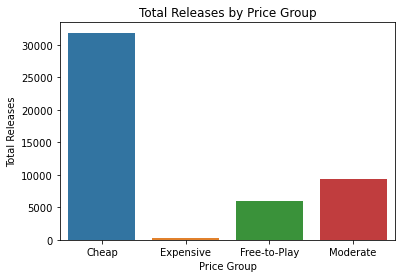

In [77]:
releases = games.groupby(['Price Group']).agg({'Name':'count'}).reset_index()
ax = sns.barplot(x='Price Group', y='Name', data = releases)
ax.set(xlabel='Price Group', ylabel='Total Releases')
ax.set_title('Total Releases by Price Group')
plt.show()


### Downloads

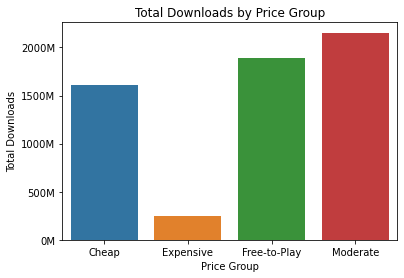

In [76]:
#Total downloads per price type
total_owner_price = games.groupby(['Price Group']).agg({'Owners':'sum'}).reset_index()
ax = sns.barplot(x='Price Group', y='Owners', data = total_owner_price)
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
ax.set(xlabel='Price Group', ylabel='Total Downloads')
ax.set_title('Total Downloads by Price Group')
plt.show()

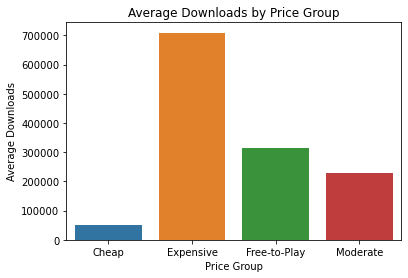

In [75]:
#Average downloads per price type
avg_owners_price = games.groupby(['Price Group']).agg({'Owners':'mean'}).reset_index()
ax = sns.barplot(x='Price Group', y='Owners', data = avg_owners_price)
ax.set(xlabel='Price Group', ylabel='Average Downloads')
ax.set_title('Average Downloads by Price Group')
plt.show()

Looking at the number of releases and downloads we see that there may be a saturation of cheap games. Steam is dominated by cheap games. The total number of cheap games published on steam is greater than the sum of the other price types. Despite this, the Free-to-Play and Moderate games have a higher total number of downloads.
When looking at the average downloads per price type, cheap games are by far the games that have fewer downloads per game. Expensive games stand out above the rest. This is directly related to one of the conclusions we have drawn before, the total number of games released has a negative impact on the overall quality and retention of games on the platform. Expensive games are the ones with the fewest releases by far but at the same time, they are the ones with the most downloads on average.

Let's go a bit deeper and look at how the different price types are distributed in the different download ranges.

### How is each type of price distributed in the different ownership ranges?

In [22]:

f2p = games[(games['Price Group'] == 'Free-to-Play')][['Name', 'Rating', 'Price Group','Owners']]
cheap = games[(games['Price Group'] == 'Cheap')][['Name', 'Rating','Price Group','Owners']]
moderate = games[(games['Price Group'] == 'Moderate')][['Name', 'Rating','Price Group', 'Owners']]
expensive = games[(games['Price Group'] == 'Expensive')][['Name', 'Rating','Price Group','Owners']]
f2p_ownership_distrib = f2p.groupby('Owners').agg({'Name':'count'}).reset_index().rename(columns={'Name': 'Free-to-Play'})
cheap_ownership_distrib = cheap.groupby('Owners').agg({'Name':'count'}).reset_index().rename(columns={'Name': 'Cheap'})
moderate_ownership_distrib = moderate.groupby('Owners').agg({'Name':'count'}).reset_index().rename(columns={'Name': 'Moderate'})
expensive_ownership_distrib = expensive.groupby('Owners').agg({'Name':'count'}).reset_index().rename(columns={'Name': 'Expensive'})

#Add sufix to the columns

f2p_ownership_distrib = f2p_ownership_distrib.assign(F2P_Perc = (f2p_ownership_distrib['Free-to-Play']/len(f2p)*100))
cheap_ownership_distrib = cheap_ownership_distrib.assign(Cheap_Perc = (cheap_ownership_distrib['Cheap']/len(cheap)*100))
moderate_ownership_distrib = moderate_ownership_distrib.assign(Mod_Perc = (moderate_ownership_distrib['Moderate']/len(moderate)*100))
expensive_ownership_distrib = expensive_ownership_distrib.assign(Exp_Perc = (expensive_ownership_distrib['Expensive']/len(expensive)*100))

In [23]:
#Merge
merged = pd.merge(f2p_ownership_distrib,cheap_ownership_distrib, on='Owners').merge(moderate_ownership_distrib, on='Owners').merge(expensive_ownership_distrib, on='Owners')
merged = merged.reset_index(drop=True)
merged

,Owners,Free-to-Play,F2P_Perc,Cheap,Cheap_Perc,Moderate,Mod_Perc,Expensive,Exp_Perc
0,10000,2944,48.993177,24115,75.740444,5340,56.953925,139,40.524781
1,35000,1156,19.237810,3908,12.274255,1224,13.054608,39,11.370262
2,75000,656,10.916958,1683,5.285970,785,8.372440,22,6.413994
3,150000,460,7.655184,1022,3.209900,632,6.740614,21,6.122449
4,350000,396,6.590115,750,2.355602,636,6.783276,32,9.329446
5,750000,167,2.779165,220,0.690976,355,3.786263,26,7.580175
6,1500000,104,1.730737,85,0.266968,208,2.218430,31,9.037901
7,3500000,74,1.231486,40,0.125632,150,1.599829,26,7.580175
8,7500000,26,0.432684,8,0.025126,31,0.330631,5,1.457726
9,15000000,14,0.232984,4,0.012563,11,0.117321,2,0.583090


We can draw some interesting conclusions from the table. 

- Free-to-play games: they dominate for the 35k-150k downloads. For large ranges, they are behind expensive games and for some ranges also behind Moderate games. So, free-to-play games can get above 10k downloads but have difficulties getting over 350k. It is also important to say that before cleaning the dataset, there were a lot of games with zero or few downloads and no interactions. Free-to-play games dominated this type of game. Free games have a higher tendency for players to download them but never play them.

- Cheap games: Most cheap games are situated in the range of 10k downloads. 75% of all cheap games are situated in this range. They are the type of game that has the fewest games in the highest downloads range. This coincides with the conclusions we have drawn before, there is a saturation of cheap games. Even though these games have downloads, they fail to attract a large player base.

- Moderate games: They are the type of game with more games with 10k downloads. We can also see how the game distribution from the 35k to 350k range is better distributed than in the rest of the games. In the range of 750k-35M, they are just behind expensive games.

- Expensive games: Expensive games dominate after 350k downloads.


Let's now look at absolute values and how the top 100 is distributed. I will make some new tables to better analyze these variables. 


### How is the top 100 most downloaded games distributed by price group?

In [24]:
top100 = games.sort_values(by='Owners', ascending = False)[['Name', 'Owners', 'Price Group']].head(100)
top100_count = top100.groupby(['Price Group']).agg({'Owners':'count'}).reset_index()
top100_count

,Price Group,Owners
0,Cheap,13
1,Expensive,5
2,Free-to-Play,47
3,Moderate,35


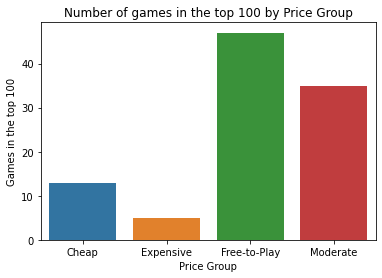

In [74]:
ax = sns.barplot(x='Price Group',y='Owners', data=top100_count)
ax.set(xlabel='Price Group', ylabel='Games in the top 100')
ax.set_title('Number of games in the top 100 by Price Group')
plt.show()

Free-to-play and moderate games dominate the top 100.

### How many games of each type has 20000k+. how many 50000k+, how many 100k+, how many 500000k+, how many 1M+?

In [26]:
prices = games[['Name', 'Owners', 'Price Group', 'Price_type']]

In [27]:
import warnings
warnings.filterwarnings('ignore')
prices['+10k'] = np.where(prices['Owners'] >= 10000, 1, 0)
prices['+50k'] = np.where(prices['Owners'] >= 50000, 1, 0)
prices['+100k'] = np.where(prices['Owners'] >= 100000, 1, 0)
prices['+500k'] = np.where(prices['Owners'] >= 500000, 1, 0)
prices['+1M'] = np.where(prices['Owners'] >= 1000000, 1, 0)
prices['+10M'] = np.where(prices['Owners'] >= 10000000, 1, 0)
prices['+100M'] = np.where(prices['Owners'] >= 100000000, 1, 0)

In [28]:
columns = ['+10k', '+50k', '+100k', '+500k', '+1M','+10M','+100M']
pivot = prices.pivot_table(index='Price Group', 
                       values=['+10k', '+50k', '+100k', '+500k', '+1M','+10M','+100M'], aggfunc=np.sum
                      ).sort_index()

In [29]:
pivot = pivot[['+10k', '+50k', '+100k', '+500k', '+1M','+10M','+100M']].reindex(['Free-to-Play', 'Cheap', 'Moderate', 'Expensive'])
pivot

,+10k,+50k,+100k,+500k,+1M,+10M,+100M
Price Group,,,,,,,
Free-to-Play,6009,1909,1253,397,230,26,1
Cheap,31839,3816,2133,361,141,8,0
Moderate,9376,2812,2027,759,404,15,0
Expensive,343,165,143,90,64,2,0


By looking at absolute numbers we can arrive at some conclusions:

- Free-to-play is the type of price with more games in +10M downloads
- Cheap games suffer to get more than 10k downloads
- As we have seen with percentages, moderate games have a better distribution of games than the other types
- Expensive games, despite being a small number of games allocate an important number of games in the large downloads ranges

To sum up the percentages and absolute numbers study.
- Free-to-play games have a double-edged sword. Being free allows them to arrive at a bigger audience. This means that some players will download the game and never play, but if the game is good enough, it can bring network effects and grow a large audience. Free-to-play games dominate for +10M downloads.
- Cheap games are oversaturated. Are the most released games but can't grow over the 10k downloads. This can be a sign that games should look to alternative pricing strategies. 
- Moderate games work well. They can attract a player base(are the type of games with less than 0 downloads games) and have a nice distribution at the mid-large downloads range. 
- Expensive games are the least released games but are also the type of game that relatively are more able to get games to large downloads

It would be great to have the budget for each game. Looking at the data it makes sense to think that the budget can have a huge effect on the downloads of the games. Expensive games are normally triple AAA games or games with huge budgets like can be New World. At the same time, Free-to-play games that dominate the top 100 like can be Dota2 or CS:GO have a huge budget. So, the budget can be a huge factor in the success of the games. Unfortunately, we don't have that information in the dataset.

### Playtime

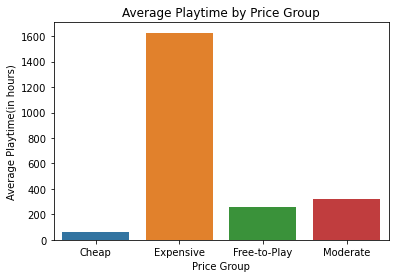

In [73]:
#Average playtime per price group
average_playtime = games.groupby(['Price Group']).agg({'Average playtime forever':'mean'}).reset_index()
ax = sns.barplot(x='Price Group', y='Average playtime forever', data = average_playtime)
ax.set(xlabel='Price Group', ylabel='Average Playtime(in hours)')
ax.set_title('Average Playtime by Price Group')
plt.show()

### Rating

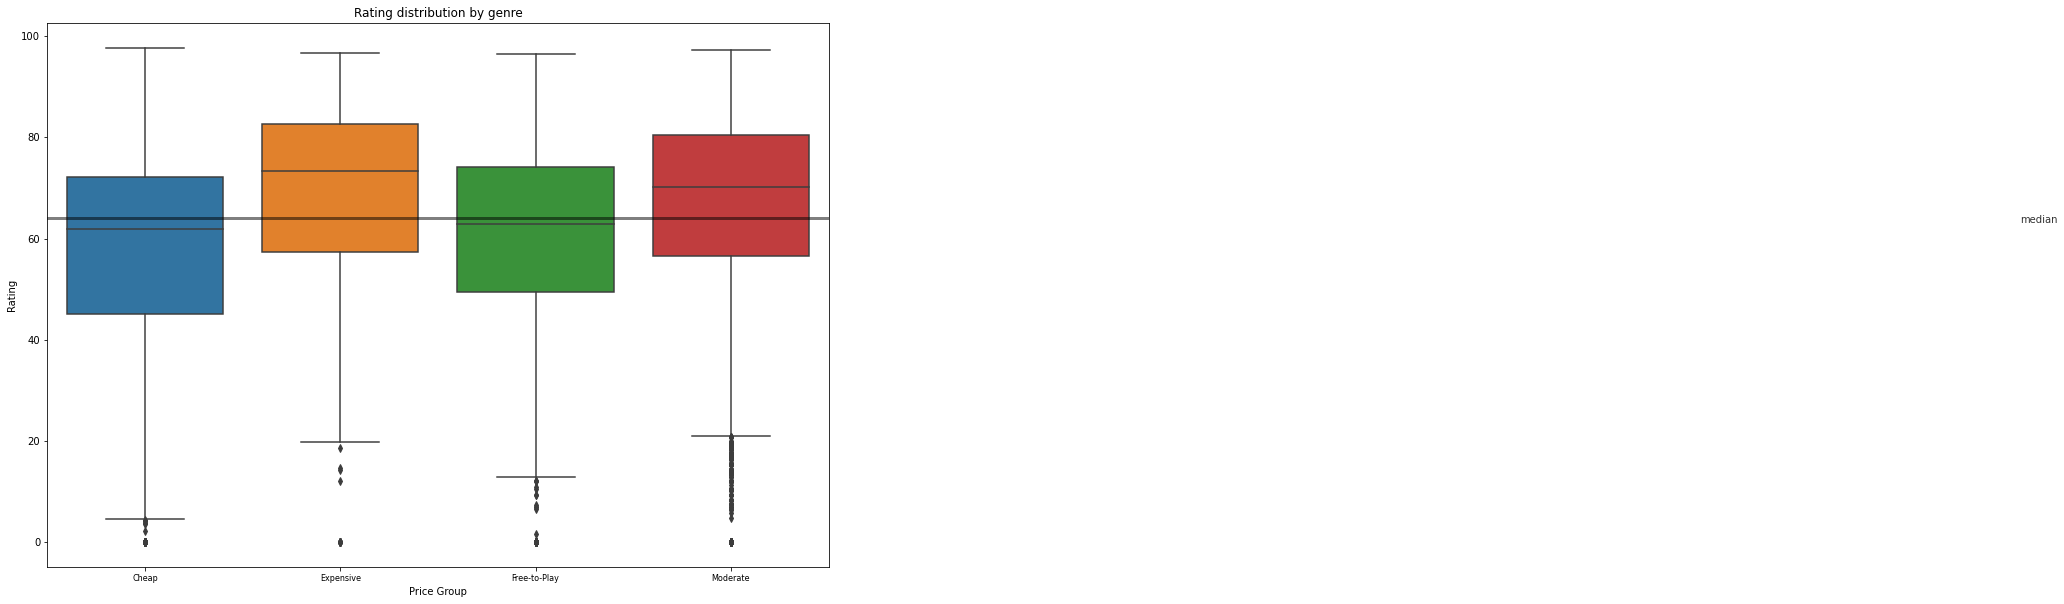

In [31]:
order = ['Cheap', 'Expensive','Free-to-Play', 'Moderate']
fig, ax = plt.subplots(figsize=(14,10))
sns.boxplot(x='Price Group', y='Rating', data=games, order = order)
ax.axhline(games.Rating.median(), color='black', lw=3, alpha=.5)
ax.text(9.6, games.Rating.median()-1, 'median', color='black', alpha=.8)

ax.tick_params(axis='x', labelsize=8)
ax.set_title("Rating distribution by genre");
plt.show()

In [32]:
print(f'Mean rating F2P: {f2p.Rating.mean():.2f}%')
print(f'Mean rating Cheap: {cheap.Rating.mean():.2f}%')
print(f'Mean rating Moderate: {moderate.Rating.mean():.2f}%')
print(f'Mean rating Expensive: {expensive.Rating.mean():.2f}%')

Mean rating F2P: 60.46%
Mean rating Cheap: 57.05%
Mean rating Moderate: 65.22%
Mean rating Expensive: 67.17%


- Average playtime: we can see that expensive games are the games that on average have better retention. This may be produced by the sunk cost of spending a lot of money on the game. The fact that you have to spend an important amount of money on the game will make spend more time playing it to make the investment worth it. This sunk cost does not have an effect if the investment is not large enough. We see how free-to-play games have a better average playtime than cheap games and it's close to moderate games. As we have seen with the previous variables, cheap games are not working on steam. 

- Rating: we see how expensive and moderate games have a big difference in rating with free-to-play and cheap games. Large prices have an impact on the rating. As we have discussed earlier, this could be done by the budget of the games. 

Let's see if the difference between the different price groups is significant. By performing an analysis of variance(ANOVA), we can determine if the variation in the rating is determined by the variation in price.
The null hypothesis is: #Ho: games grouped by price type have the same population mean(price variations have no effect on the mean).

In [33]:
#Create specific dataframes to make the study:
f2p = games[(games['Price Group'] == 'Free-to-Play')]
f2p_rat= f2p['Rating']
cheap = games[(games['Price Group'] == 'Cheap')]
cheap_rat = cheap['Rating']
moderate = games[(games['Price Group'] == 'Moderate')]
mod_rat = moderate['Rating']
expensive = games[(games['Price Group'] == 'Expensive')]
exp_rat = expensive['Rating']

In [34]:
#p-values
#Does price have an effect in ratings? Variation in ratings vs variation in price
#Ho: games grouped by price type have the same population mean(variations in price have no effect on the mean)
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd #import the function for a pairwise Tukey HSD test

#The p-value can also be obatined by using f_oneway test
fval, pval = f_oneway(f2p_rat,cheap_rat,mod_rat,exp_rat)
print(fval)
print(pval)



391.30201185669256
4.1332692732489375e-251


Since the p-value is so low (much lower than the traditional cut-off of 0.05), the null hypothesis is rejected. As a result, it can be concluded that price does impact rating. The ANOVA alone cannot indicate which price group has different ratings.  But since the ANOVA results were statistically significant, it is appropriate to apply an ad hoc test,  such as Tukey's honestly significant difference (HSD) test that can determine which price groups have statistically significant ratings from each other.

In [35]:
tukeyHSD_results = pairwise_tukeyhsd(endog=games['Rating'], #perform the pairwise Tukey HSD test
                          groups=games['Price Group'],
                          alpha=0.05) # the p-value cut-off for statistical significance is defined as 0.05
print(tukeyHSD_results)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
       Cheap    Expensive  10.1159    0.0  7.1865 13.0453   True
       Cheap Free-to-Play   3.4102    0.0  2.6512  4.1692   True
       Cheap     Moderate   8.1674    0.0  7.5333  8.8015   True
   Expensive Free-to-Play  -6.7057    0.0 -9.7014 -3.7099   True
   Expensive     Moderate  -1.9485 0.3303 -4.9151   1.018  False
Free-to-Play     Moderate   4.7571    0.0  3.8654  5.6489   True
----------------------------------------------------------------


Here, the null hypothesis is that there is no difference in Ratings between the two price groups being compared. Based on the results, this null hypothesis can be rejected for Cheap/Expensive, Cheap/F2P, Cheap/Moderate, and Expensive/F2P and F2P/Moderate. 

With all these results, we can say that price has an impact on rating. Expensive and moderate dominate over the other two groups. But, between Expensive and moderate there are no statistical differences in rating(we do not reject the null hypothesis in the Tukey test for these two variables).

## GENRE 

When looking at genres, it is important to know that a game can have different genres. In the cleaning process, I removed all the genres that were not gaming(For example Utility Apps or Education apps).

In [36]:
#select the genre columns
genre_col = games.columns[-11:-1]
genre_col

Index(['Action', 'Adventure', 'Casual', 'Indie', 'Massively Multiplayer',
       'RPG', 'Racing', 'Simulation', 'Strategy', 'Sports'],
      dtype='object')

### Games released per genre 

Text(0.5, 1.0, 'Total Releases by Genre')

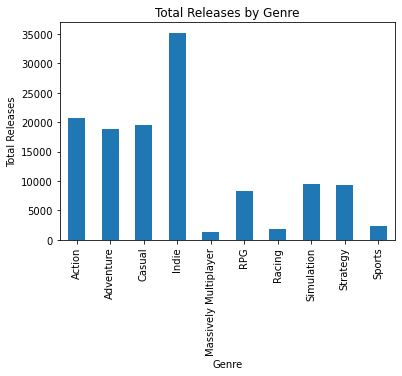

In [78]:
ax = games[genre_col].sum().plot.bar()
ax.set(xlabel='Genre', ylabel='Total Releases')
ax.set_title('Total Releases by Genre')

### Total downloads per genre 

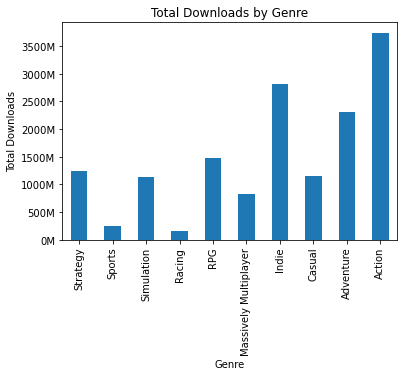

In [79]:
total_owners = games[genre_col].multiply(games['Owners'], axis ='index').sum()
ax = total_owners.sort_index(ascending = False).plot.bar()
ax.set(xlabel='Genre', ylabel='Total Downloads')
ax.set_title('Total Downloads by Genre')
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)


### Average downloads per genre

[Text(0.5, 0, 'Genre'), Text(0, 0.5, 'Average downloads')]

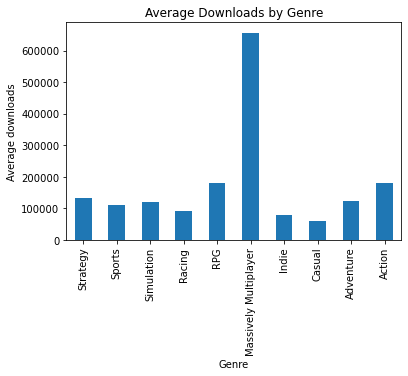

In [80]:
total_owners_genre = games[genre_col].multiply(games['Owners'], axis ='index').sum()
avg_owners_genre = total_owners_genre/ games[genre_col].sum()
ax= avg_owners_genre.sort_index(ascending = False).plot.bar()
ax.set_title('Average Downloads by Genre')
ax.set(xlabel='Genre', ylabel='Average downloads')

- The most released genre are Indie games, followed by Action,  Adventure and casual games. RPGs, simulation and strategy are one step below. MMOs, Racing and sports are the least released games. 

- When looking at total downloads we see some changes. Action dominates steam with over 1400M downloads. Then we have Indie and Adventure with around 1000M downloads. Strategy, RPGs, Simulation, Casual and MMOs are around 400M-600M downloads range. Sports and Racing have the least total downloads with around 100M downloads.

- When looking at average downloads, the context changes dramatically. MMOs are the type of games with more downloads with respect to total releases. Creating an MMO requires a lot of capital and time, which is why we see few releases, but at the same time, they tend to have a lot of hype and attract many players. Action and RPG still do well on average. Indie and Casual games are the most affected genres when looking at average ownership per total downloads. 


### Does genre have an effect in rating?

Let's start by doing an Anova test to determine if the variation in rating is determined by the variation in genre.
The null hypothesis is: #Ho: games grouped genre have the same population mean(variations in genre have no effect on the mean).

In [40]:
#Does genre has an effect on ratings?
f = stats.f_oneway(*(games.loc[games[g] == 1, 'Rating'].values for g in genre_col))
f

F_onewayResult(statistic=33.231058974325244, pvalue=4.839902397231158e-59)

The p-value is smaller than the threshold(0.05), the null hypothesis is rejected. It can be concluded that genre does impact rating. Let's look at graphs and tables describing the relationship between genres and rating to see how big these differences are.

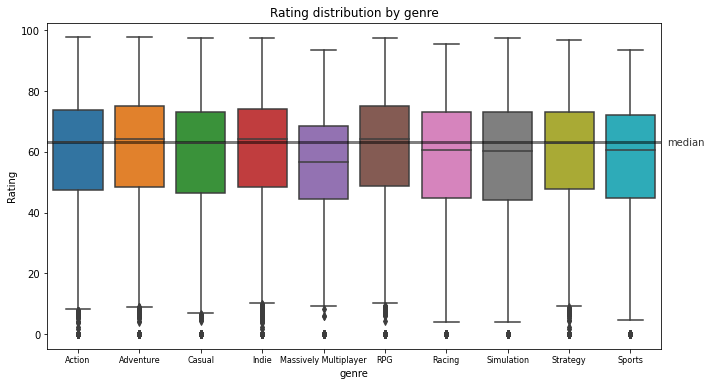

In [41]:
g_df = pd.DataFrame()

# create new dataframe with rating and genre, as games can belong to multiple genres
for col in genre_col:
    ratings = pd.DataFrame(games.loc[games[col] == 1, 'Rating'].values, columns=['Rating'])
    ratings['genre'] = col
    g_df = pd.concat([g_df, ratings], axis=0)

fig, ax = plt.subplots(figsize=(11,6))
sns.boxplot(x='genre', y='Rating', data=g_df)
ax.axhline(g_df.Rating.median(), color='black', lw=3, alpha=.5)
ax.text(9.6, g_df.Rating.median()-1, 'median', color='black', alpha=.8)

ax.tick_params(axis='x', labelsize=8)
ax.set_title("Rating distribution by genre");
plt.show()

In [42]:
# Dictionary to store mean ratings for each genre column
mean_ratings = {}

# Iterate through each genre column and calculate mean rating
for col in genre_col:
    mean_rating = games[games[col] == 1]['Rating'].mean()
    mean_ratings[col] = mean_rating

# Print the mean ratings for each genre column
for genre, mean_rating in mean_ratings.items():
    print(f"Mean rating for {genre}: {mean_rating}")

Mean rating for Action: 58.642908758324936
Mean rating for Adventure: 59.70623306811145
Mean rating for Casual: 57.91721114394197
Mean rating for Indie: 59.34960374118582
Mean rating for Massively Multiplayer: 54.725680433552014
Mean rating for RPG: 59.6045885129956
Mean rating for Racing: 56.8622380637894
Mean rating for Simulation: 56.522392299236124
Mean rating for Strategy: 58.598146729562934
Mean rating for Sports: 56.50708975593634


Adventure and RPGs are the genres with the highest rating on average. Action, Indie and Strategy are also above the median of all the games rating. Racing, Casual, Simulation and sports have a slightly lower rating than most. MMOs are the worst rated genre. It looks like the expectations of players in the game can have a huge impact on how they rate the game. As we have said before, MMOs are usually games with huge budgets that attract a lot of attention from players. Despite this, the genre has not managed to meet the expectations of the players.

Let's move on to have a look at what is the price distribution of each genre. 

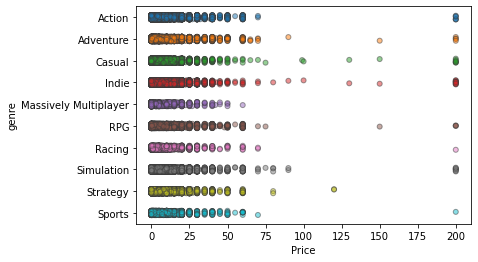

In [43]:
#Price distribution per genre
g_df = pd.DataFrame()

for col in genre_col:
    temp_df = games[games[col] == 1].copy()
    temp_df['genre'] = col
    g_df = pd.concat([g_df, temp_df], axis=0)


recent_df = g_df[g_df['Release Year'] >= 2018].copy()
ax = sns.stripplot(x='Price', y='genre', data=recent_df, jitter=True, alpha=.5, linewidth=1);

In [44]:
#Downloads dsitribution per price
genre_price = pd.DataFrame({'Price Group': games['Price Group']})
for genre in genre_col:
    counts = games.groupby(['Price Group'])[genre].sum().reset_index()
    counts.columns = ['Price Group',genre]
    genre_price = pd.merge(genre_price, counts, on='Price Group')

genre_price = genre_price.groupby('Price Group').first()


genre_totals  = genre_price.iloc[:, 0:].sum()

for col in genre_price.columns[0:]:
    genre_price[col+'_prop'] = (genre_price[col] / genre_totals.loc[col])*100
    
    
genre_price = genre_price.drop(genre_price.columns[[0,1,2,3,4,5,6,7,8,9]], axis=1)


#order the columns
genre_price= genre_price.reindex(['Free-to-Play', 'Cheap', 'Moderate', 'Expensive']).reset_index()
genre_price

,Price Group,Action_prop,Adventure_prop,Casual_prop,Indie_prop,Massively Multiplayer_prop,RPG_prop,Racing_prop,Simulation_prop,Strategy_prop,Sports_prop
0,Free-to-Play,12.527716,10.885726,11.802323,11.692334,53.475513,14.322034,10.423634,12.108472,12.941677,13.687392
1,Cheap,65.916321,66.434792,76.630685,70.548957,29.620853,57.469734,67.335563,60.353164,62.547893,61.096718
2,Moderate,20.837752,22.153781,11.367473,17.628005,16.271722,27.082324,21.070234,26.697498,23.861218,23.920553
3,Expensive,0.718211,0.525701,0.199519,0.130704,0.631912,1.125908,1.170569,0.840866,0.649212,1.295337


By looking at both the table and the graph, we can say that for all the genres, the vast majority of games are allocated under 10 dollars price. Cheap games dominate all genres except for MMOs. The price of the dataset reflects the current price when extracted from the Steam API and not the current price. Many MMOs follow a subscription model. The games are free and then players pay monthly, this monthly payment is not recorded in the dataset. For this reason, the 55 percent of free-to-play games in MMOs is not a reflection of reality. Then, it is interesting to see that some genres like RPGs, Racing or Sports have more games over 50$(expensive games).

Let's make the same table we have done with prices, but with downloads ranges to see how each genre has done in downloads.

In [45]:
#Downloads dsitribution per genre
genre_counts = pd.DataFrame({'Owners': games['Owners']})
for genre in genre_col:
    counts = games.groupby(['Owners'])[genre].sum().reset_index()
    counts.columns = ['Owners',genre]
    genre_counts = pd.merge(genre_counts, counts, on='Owners')

genre_counts = genre_counts.groupby('Owners').first().reset_index()

#add percentage columns
genre_totals  = genre_counts.iloc[:, 1:].sum()

for col in genre_counts.columns[1:]:
    genre_counts[col+'_prop'] = (genre_counts[col] / genre_totals.loc[col])*100

In [46]:
genre_counts

,Owners,Action,Adventure,Casual,Indie,Massively Multiplayer,RPG,Racing,Simulation,Strategy,...,Action_prop,Adventure_prop,Casual_prop,Indie_prop,Massively Multiplayer_prop,RPG_prop,Racing_prop,Simulation_prop,Strategy_prop,Sports_prop
0,10000,14104,12712,14681,24938,553,4915,1237,6472,5903,...,67.984190,67.502124,75.106154,70.858669,43.680885,59.503632,68.952062,68.026067,62.824606,73.100173
1,35000,2586,2632,2404,4621,173,1284,217,1155,1338,...,12.465054,13.976211,12.298562,13.130079,13.665087,15.544794,12.095875,12.140004,14.240102,10.967185
2,75000,1317,1275,1075,2191,125,720,117,671,720,...,6.348212,6.770391,5.499565,6.225493,9.873618,8.716707,6.521739,7.052764,7.662835,5.829016
3,150000,896,883,643,1481,119,491,89,452,558,...,4.318905,4.688828,3.289507,4.208104,9.399684,5.944310,4.960981,4.750893,5.938697,3.497409
4,350000,883,727,481,1192,110,422,84,412,498,...,4.256242,3.860450,2.460736,3.386941,8.688784,5.108959,4.682274,4.330460,5.300128,3.626943
5,750000,410,290,152,439,79,218,25,175,193,...,1.976285,1.539932,0.777613,1.247372,6.240126,2.639225,1.393534,1.839395,2.054066,1.208981
6,1500000,263,166,61,181,44,109,14,97,105,...,1.267714,0.881478,0.312068,0.514292,3.475513,1.319613,0.780379,1.019550,1.117497,0.863558
7,3500000,199,100,31,107,36,69,10,57,62,...,0.959221,0.531011,0.158592,0.304029,2.843602,0.835351,0.557414,0.599117,0.659855,0.604491
8,7500000,46,26,12,24,11,15,0,11,15,...,0.221729,0.138063,0.061390,0.068193,0.868878,0.181598,0.000000,0.115619,0.159642,0.172712
9,15000000,24,11,4,13,11,10,1,11,3,...,0.115685,0.058411,0.020463,0.036938,0.868878,0.121065,0.055741,0.115619,0.031928,0.129534


In [47]:
#The table is really large, we just want the percentages to understand relatively how well each genre has done in downloads.
#Let's remove the absolute columns:
genre_counts = genre_counts.drop(genre_counts.columns[[1,2,3,4,5,6,7,8,9,10]], axis=1)

In [48]:

genre_counts

,Owners,Action_prop,Adventure_prop,Casual_prop,Indie_prop,Massively Multiplayer_prop,RPG_prop,Racing_prop,Simulation_prop,Strategy_prop,Sports_prop
0,10000,67.984190,67.502124,75.106154,70.858669,43.680885,59.503632,68.952062,68.026067,62.824606,73.100173
1,35000,12.465054,13.976211,12.298562,13.130079,13.665087,15.544794,12.095875,12.140004,14.240102,10.967185
2,75000,6.348212,6.770391,5.499565,6.225493,9.873618,8.716707,6.521739,7.052764,7.662835,5.829016
3,150000,4.318905,4.688828,3.289507,4.208104,9.399684,5.944310,4.960981,4.750893,5.938697,3.497409
4,350000,4.256242,3.860450,2.460736,3.386941,8.688784,5.108959,4.682274,4.330460,5.300128,3.626943
5,750000,1.976285,1.539932,0.777613,1.247372,6.240126,2.639225,1.393534,1.839395,2.054066,1.208981
6,1500000,1.267714,0.881478,0.312068,0.514292,3.475513,1.319613,0.780379,1.019550,1.117497,0.863558
7,3500000,0.959221,0.531011,0.158592,0.304029,2.843602,0.835351,0.557414,0.599117,0.659855,0.604491
8,7500000,0.221729,0.138063,0.061390,0.068193,0.868878,0.181598,0.000000,0.115619,0.159642,0.172712
9,15000000,0.115685,0.058411,0.020463,0.036938,0.868878,0.121065,0.055741,0.115619,0.031928,0.129534


We can get to some conclusions from this table:
- 10k downloads range dominates for all games. Despite this, MMOs are the genre with fewer games in this range, just 43%. RPGs are the second genre with fewer games in this range, 59%. The rest of genres are around 60-75%.
- We see similar distributions among all the genres for all the ranges. The only difference is MMOs, which dominate from 75k to 15M.
- Dota2 is the reason why Action and Strategy have a game in 150M+.

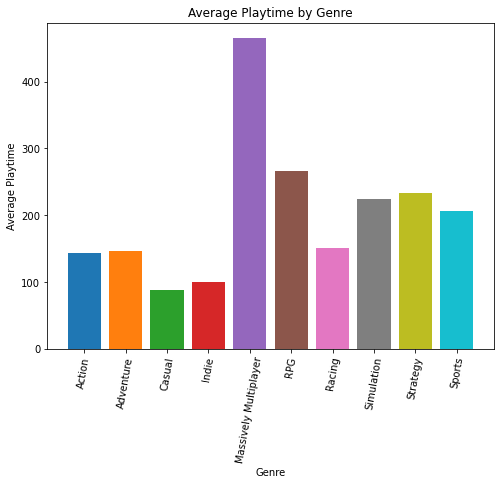

In [49]:
genre_playtime={}
for genre in genre_col:
    group = games[games[genre] == 1]['Average playtime forever'].mean()
    genre_playtime[genre]=group

fig, ax = plt.subplots(figsize=(8,6))
for genre, playtime in genre_playtime.items():
    ax.bar(genre, playtime, label=genre)
ax.set_title("Average Playtime by Genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Average Playtime")
plt.xticks(rotation=80)
plt.show()

In [50]:
# Dictionary to store mean playtime for each genre column
avg_playtimes = {}

# Iterate through each genre column and calculate mean playtime
for col in genre_col:
    avg_playtime = games[games[col] == 1]['Average playtime forever'].mean()
    avg_playtimes[col] = avg_playtime

# Print the mean playtime for each genre column
for genre, avg_playtime in avg_playtimes.items():
    print(f"Mean rating for {genre}: {avg_playtime}")

Mean rating for Action: 143.21729490022173
Mean rating for Adventure: 145.95831563296517
Mean rating for Casual: 87.86770348391057
Mean rating for Indie: 99.43575609478889
Mean rating for Massively Multiplayer: 465.22432859399686
Mean rating for RPG: 266.8176755447942
Mean rating for Racing: 151.4264214046823
Mean rating for Simulation: 224.1224511246584
Mean rating for Strategy: 233.43720732226478
Mean rating for Sports: 206.01640759930916


Main findings:
- MMOs are by large the genre with more average playtime. As we have discussed early, this may be done by the sunk cost of the subscription model. As players are spending more money on the game, they feel they need to spend more time playing it. 
- Then we have a second group of genres situated around the 200 h average playtime. RPGs, Sports, Simulation and Strategy form this group. These 4 are 4 genres that were not doing well in total downloads, but they look good on retention. 
- We have a last group of genres with around 100h of average playtime. Action, Adventure, Casual, Indie and Racing form this group. It is noteworthy that genres such as Action, Adventure or Indie which have a lot of total downloads and good ratings, perform so badly in average playtime. This may be caused because these games are shorter than for example MMOs. We have no data on the length of the games, so this is something to be careful about. Probably casual games are the shortest games and this is the reason why they are the genre with less average playtime. 

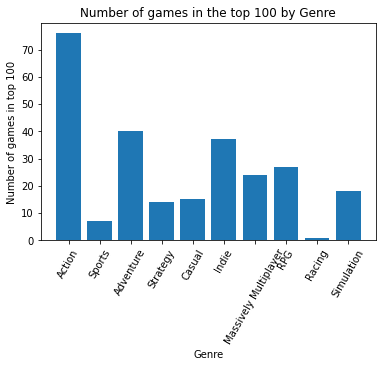

In [81]:
#Number of games in the top 100 per genre
top100 = games.sort_values(by='Owners', ascending = False)[['Name', 'Action', 'Sports', 'Adventure', 'Strategy', 'Casual','Indie','Massively Multiplayer','RPG','Racing','Simulation']].head(100)
genre_top100 = top100.iloc[:, 1:].sum()

# Create bar plot
plt.bar(genre_top100.index, genre_top100.values)
plt.xticks(rotation=60)
plt.title('Number of games in the top 100 by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of games in top 100')
plt.show() 

Action games dominate the top 100 with more than 70 games. Adventure and Indie do also have an important representation with nearly 40 games.  Sports and Racing are the categories with less representation in the top 100. 

### PUBLISHERS AND DEVS

The analysis process for publishers and devs will be as follows:
- We will start by looking at how many publishers/developers have more than one game in the top 100
- Then we will look at the top10 devs/publishers with more total downloads
- After this, our analysis will be focused on these top 10 companies. We will create a table where we will see how many games were released by each of these companies, total downloads, average rating and number of free-to-play games


### Developers

In [52]:
#How is the top100 games distributed by devs?
top_100_devs = games.sort_values(by='Owners', ascending = False).head(100)
top_devs = top_100_devs.groupby('Developers').agg({'Name':'count'}).sort_values(by='Name', ascending=False).reset_index()
top_devs_counts_gt = top_devs[top_devs['Name'] >1]
top_devs_counts_gt


,Developers,Name
0,Valve,4
1,CD PROJEKT RED,2
2,"DONTNOD Entertainment,Feral Interactive (Mac),...",2
3,Wargaming Group Limited,2
4,"Firaxis Games,Aspyr (Mac),Aspyr (Linux)",2
5,Bohemia Interactive,2


In [53]:
#Devs that sold most games
top_devs = games.groupby('Developers').agg({'Owners':'sum'}).reset_index()
top_devs = top_devs.sort_values(by='Owners', ascending = False).head(10)
top_devs

,Developers,Owners
26204,Valve,188510000
12955,"KRAFTON, Inc.",75750000
26206,"Valve,Hidden Path Entertainment",75000000
1309,Amazon Games,75000000
25789,Ubisoft Montreal,48985000
3919,"CAPCOM Co., Ltd.",48635000
20436,Respawn Entertainment,40075000
6573,Digital Extremes,36500000
3945,CD PROJEKT RED,35750000
8175,Facepunch Studios,35120000


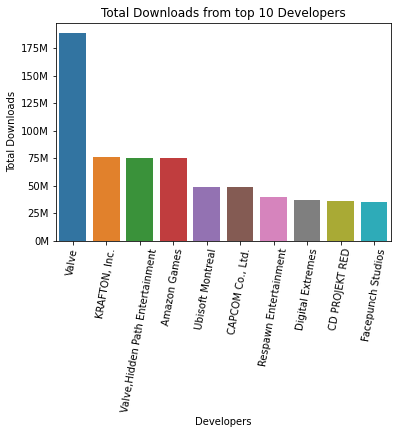

In [82]:
ax =sns.barplot(x='Developers', y='Owners', data = top_devs)
ax.set(xlabel='Developers', ylabel='Total Downloads')
ax.set_title('Total Downloads from top 10 Developers')
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=80)
plt.show()

- In the top 100 we have just 6 developers with more than 1 game. 
- Valve dominates the steam marketplace in total downloads. They have sold nearly 200M in the 11 years we have analyzed. 
- It is also important to notice that the 3rd developer with more downloads(75M) is Valve with Hidden Path Entertainment. This collaboration between the two developers resulted in CS:GO, one of the most popular games on steam. I have decided not to count the collaborations or the different departments of a company(for example, Ubisoft is not the same Developer as Ubisoft Montreal in the dataset) as separate parts. I think that for example, CS:GO is the result of the collaboration between the two companies. If Valve or Hidden Path Entertainment had developed alone CS:GO, probably the results would have not been the same. 
- Krafton and Amazon Games also sum around 75M downloads.
- The rest of the top10 is situated around 35M-50M downloads.

Let's dig deeper into the top 10 developers. 

In [56]:
#Let's analyze the top 10 devs. We will have a look at releases, downloads, rating, average playtime and the number of f2p games designed
developer_stats = games.groupby('Developers').agg(
    total_releases=('Name', 'count'),
    total_downloads=('Owners', 'sum'),
    average_rating=('Rating', 'mean'),
    average_playtime = ('Average playtime forever', 'mean')).sort_values(by='total_downloads', ascending =False).head(10)
# reset the index to make Developer a column instead of the index
developer_stats = developer_stats.reset_index()


In [58]:
#Add column of f2p games:
# count number of games with price > 0 for each developer
price_count = games.groupby('Developers')['Price'].apply(lambda x: (x == 0).sum())


# merge the two new columns with the previous dataframe
developer_stats = pd.merge(developer_stats, price_count, on='Developers')


# rename the columns
developer_stats.rename(columns={'Price':'F2P Games'}, inplace=True)
developer_stats

,Developers,total_releases,total_downloads,average_rating,average_playtime,F2P Games
0,Valve,8,188510000,85.282646,5508.875000,4
1,"KRAFTON, Inc.",2,75750000,64.294332,11084.000000,1
2,"Valve,Hidden Path Entertainment",1,75000000,87.869186,30484.000000,1
3,Amazon Games,1,75000000,66.878484,7432.000000,0
4,Ubisoft Montreal,17,48985000,78.717480,1423.117647,1
5,"CAPCOM Co., Ltd.",20,48635000,84.331169,1626.400000,3
6,Respawn Entertainment,4,40075000,81.356266,2146.500000,1
7,Digital Extremes,2,36500000,89.136132,4919.000000,1
8,CD PROJEKT RED,5,35750000,84.612024,2031.800000,1
9,Facepunch Studios,4,35120000,71.553304,4220.750000,2



- Total releases:  CAPCOM & Ubisoft are the developers that more games have released. Valve has released 8 games but is by large the developer with more downloads, largely driven by the success of Dota2(+150M downloads). We have CD Projekt with 5 releases & Facepunch Studios and Respawn Entertainment with 4 releases. Then we have a group of developers with 1 or 2 releases who have a game with a lot of downloads. For example, Krafton Inc -> PUBG, Amazon -> New World.
- Average rating: We have previously analyzed that the increase in the release of games had a negative impact on average rating. When looking at the top 10 this is not true. There is no relationship between releases and rating. It looks like some developers are able to develop games that players like more. Valve, Capcom and Ubisoft have all average ratings near 80 or above. Valve is the second best developer by rating just behind Digital Extremes(developed games like Warframe or The Darkness II). The worst developers by rating are Krafton and Amazon games. In both cases, this bad rating is done by 1 game rating. In the case of Frafton, PUBG has an average rating of just 55. In the Amazon case, New World has a rating of 66. Near the average rating of these two developers, we have Facepunch Studios. The worst rated game of this developer is Chunks, a game that had a small number of players, with a 35 rating. The rest of games of this developer are above 77 rating. Then, we have the rest of the developers with around 80-85 rating. 
- Average playtime: unlike rating, in average playtime, we see that releasing a lot of games has a negative impact on average playtime.  The worst developers in this category are Ubisoft and Capcom, the developers that have released more games. CS:GO, the collaboration between Valve and Hidden Path Entertainment dominates average playtime. Then we have New World for Amazon Games and in the third place we have Valve, which despite having 8 games released, stills do very well on average playtime. 
- Free-to-play games: of the 66 games that make up the top 10 developers, just 15 are free(22%). Valve is the only developer with most of their games free. Of the 9 games Valve developed(counting the collaboration with Hidden Path Entertainent), 5 are free-to-play(55%). Valve's commitment to free-to-play has been successful. We have seen how they dominate in downloads and they also do very well at rating and average playtime. It is also important to say that Valve is the creator of Steam so they can have an advantage when publishing their games. 

In conclusion, in the top 10 developers by downloads, we have some developers that released many games(like Ubisoft Montreal) and other games with 1 or 2 releases like Amazon Games. We can say that having a one game hit can bring your company to the top 10. When looking at average rating, there is no clear tendency. We have games with a lot of downloads with a bad rating like PUBG(55 rating) and games with a lot of downloads with a great rating like the Witcher 3 of CD Projekt Red(95 rating). Total releases do have an effect on average playtime. The companies with the least games are the ones with more average playtime. Valve is the exception, despite having released 9 games, is able to retain players. Finally, the free-to-play model is not popular among the top 10 developers. Valve is another time the exception, having more than half of the games free. 


Let's repeat the process for Publishers

### Publishers

In [59]:
top_100_publ = games.sort_values(by='Owners', ascending = False).head(100)
top_publ3 = top_100_publ.groupby('Publishers').agg({'Name':'count'}).sort_values(by='Name', ascending=False).reset_index()
top_publ_counts_gt = top_publ3[top_publ3['Name'] >1]
top_publ_counts_gt

,Publishers,Name
0,Valve,5
1,Xbox Game Studios,3
2,Electronic Arts,3
3,Hi-Rez Studios,3
4,"2K,Aspyr (Mac),Aspyr (Linux)",3
5,Rockstar Games,2
6,Bethesda Softworks,2
7,Bohemia Interactive,2
8,Wargaming Group Limited,2
9,2K,2


In [60]:
#Repeat process for publishers
top_publ = games.groupby('Publishers').agg({'Owners':'sum'}).reset_index()
top_publ = top_publ.sort_values(by='Owners', ascending = False).head(10)
top_publ

,Publishers,Owners
22376,Valve,263860000
22013,Ubisoft,146680000
6374,Electronic Arts,125225000
23477,Xbox Game Studios,105555000
2448,Bethesda Softworks,91405000
11091,"KRAFTON, Inc.",75750000
1150,Amazon Games,75000000
18087,SEGA,65680000
15701,Paradox Interactive,60200000
4191,Coffee Stain Publishing,57685000


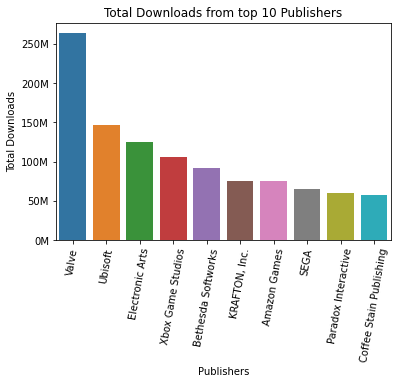

In [83]:
ax= sns.barplot(x='Publishers', y='Owners', data = top_publ)
ax.set(xlabel='Publishers', ylabel='Total Downloads')
ax.set_title('Total Downloads from top 10 Publishers')
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=80)
plt.show()

- We have less variety of publishers in the top 100 than in developers. We have 15 publishers with more than 1 game in the top 100. 
- Valve dominates the top 100 publishers but with less difference than the top 10 developers. We have new entrants in the top 100 that we do not have in the developers' top 100 like Electronic Arts or Sega. 
- It is harder to get to the top 10 publishers than the top10 developers. The last participant of the top 10 publishers has over 57M downloads, while in the developers' top 10 was over 35M.



In [62]:
publisher_stats = games.groupby('Publishers').agg(
    total_releases=('Name', 'count'),
    total_downloads=('Owners', 'sum'),
    average_rating=('Rating', 'mean'),
    average_playtime = ('Average playtime forever', 'mean')).sort_values(by='total_downloads', ascending =False).head(10)
# reset the index to make Developer a column instead of the index
publisher_stats = publisher_stats.reset_index()


In [63]:
#Add column of f2p games:
# count number of games with price > 0 for each developer
price_count_publ = games.groupby('Publishers')['Price'].apply(lambda x: (x == 0).sum())


# merge the two new columns with the previous dataframe
publisher_stats = pd.merge(publisher_stats, price_count_publ, on='Publishers')


# rename the columns
publisher_stats.rename(columns={'Price':'F2P Games'}, inplace=True)
publisher_stats

,Publishers,total_releases,total_downloads,average_rating,average_playtime,F2P Games
0,Valve,10,263860000,85.434342,7458.000000,6
1,Ubisoft,86,146680000,72.548544,1282.639535,4
2,Electronic Arts,69,125225000,77.874519,1523.144928,6
3,Xbox Game Studios,47,105555000,82.647188,1126.148936,3
4,Bethesda Softworks,43,91405000,74.829251,1138.372093,8
5,"KRAFTON, Inc.",2,75750000,64.294332,11084.000000,1
6,Amazon Games,1,75000000,66.878484,7432.000000,0
7,SEGA,122,65680000,76.195987,1303.516393,14
8,Paradox Interactive,58,60200000,70.246436,1581.068966,4
9,Coffee Stain Publishing,10,57685000,88.742795,1347.700000,0


- We can see how most of the Publishers have a large number of releases. One game hit can lead you to be part of the top developers but that is not the case for publishers(just Amazon Games and Krafton are under 10 games released). This implies that the Publishers' market is more centralized than the developers'. 
- On average, the average_rating is lower than in the developers top10. A large number of releases can be the cause for this but at the same time, publisher with a small number of releases like Amazon and Krafton have the lowest rating. This could be a topic to go deeper on. Coffee Stain Publishing and Valve are the publisher with the best rating. Xbox Game Studios also do well with an average rating of 82. The rest of publishers are under 80 average rating, Krafton and Amazon Games are the worst with average rating near 65.
- The tendency in average playtime is clear, the games with more releases are the games with the worst average playtime, so the number of releases does have a negative impact on playtime. Krafton and Amazon, the companies with fewer releases are in the top 3 of average playtime with Valve.  These 3 companies are over 7000h average playtime, the rest of the Publishers are below 2000h of playtime.
- Just 10% of all the games released by the top 10 publishers are free-to-play. As happened with Developers, Valve is the only Publisher that releases more free than paid games. 

In conclusion, the publishers' market is dominated by some big giants that released a lot of games. There is no relationship between downloads and average rating, it looks like some Publishers are just able to publish games that players like more. When looking at average playtime, we see that the number of games released has a negative impact on average playtime. Finally, free games are not a strategy that top Publishers like, Valve is the exception. 

CONCLUSION

PRICE TYPE
- Steam has a saturation of cheap games. They are the most released type of game but they have the worst performance in avg downloads, rating and playtime.
- On average expensive games are the best performers in all the categories.
- In absolute values, Free-to-Play games and Moderate games dominate the top 100.

GENRE
- MMOs attract a lot of players(most downloads and playtime on average) but fail to meet expectations and are the worst genre by rating.
- Action, Adventure & Indie games have a lot of releases and perform well in total downloads and rating.
- RPGs despite not having a lot of releases, perform relatively well in downloads, playtime and rating.

DEVELOPERS
- No developer dominates the top 100 most downloaded games. One game superhit can bring a developer to the top 100.
- Valve is the clear leader in total downloads.
- Of the top 10 developers with more downloads, just 2 have more than 10 games released. Games released have a negative impact on average playtime. Valve is the only developer from the top 10 that has more free than paid games.

PUBLISHERS

- More centralized market than developers. Of the top 10 developers with more downloads, 8 released more than 10 games. Sega released 122. In the top 10 developers, the company with more releases was Capcom with 20. 
- Valve has less domination than in the developer market but is still the clear leader.
- As with developers, games released have a negative impact on average playtime. Valve is also the only publisher with more free than paid games.




### FUTURE PROJECTS

I have really enjoyed analyzing the situation of games on steam. The dataset contains a lot of information. I have decided to focus my analysis on a few variables that I consider significant in answering our initial question. I think we have come to some clear conclusions about the state of steam and which games are most successful. I would have liked to have information about the budget of each game, but this information is not found on Steam, it is something private to each developer and publisher.

In the future, I will carry out similar projects on the Google Play Store and the Apple App Store. I would also like to do it on Xbox and PlayStation (getting data from the consoles can be more complicated). In this way, we could have an overview of which games are more successful on each platform.
